## Aula dia 18/10

Aula remota dia 18/10
atividades a serem desenvolvidas: 
Apliquem o conteúdo dos link abaixo:

https://timeseriesreasoning.com/contents/time-series-decomposition/

https://timeseriesreasoning.com/contents/white-noise-model/

https://timeseriesreasoning.com/contents/assumptions-of-linear-regression/

Escolham na internet os dada de séries temporais de duas variáveis (dados intervalados no tempo para um único ponto no espaço. Ex: temperatura e pressão em um ponto). A atividade pode ser feita em dupla.

Dados escolhidos - monitoramento de E.coli para balneabilidade IMA



iniciar com dados do site:

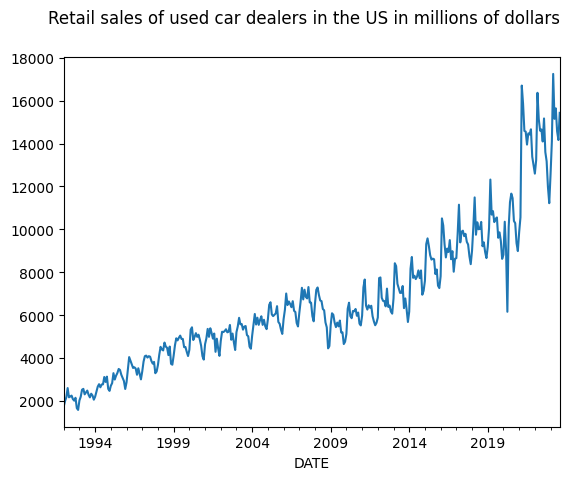

In [34]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

#load the data set into a pandas data frame
df = pd.read_csv('D:/ENS410064/Dados/brutos/retail_sales_used_car_dealers_us_1992_2020.csv', header=0, index_col=0, 
                 parse_dates=['DATE'], date_format={'DATE': '%Y-%m-%d'})

#plot the data set
fig = plt.figure()
fig.suptitle('Retail sales of used car dealers in the US in millions of dollars')
df['Retail_Sales'].plot()
plt.show()


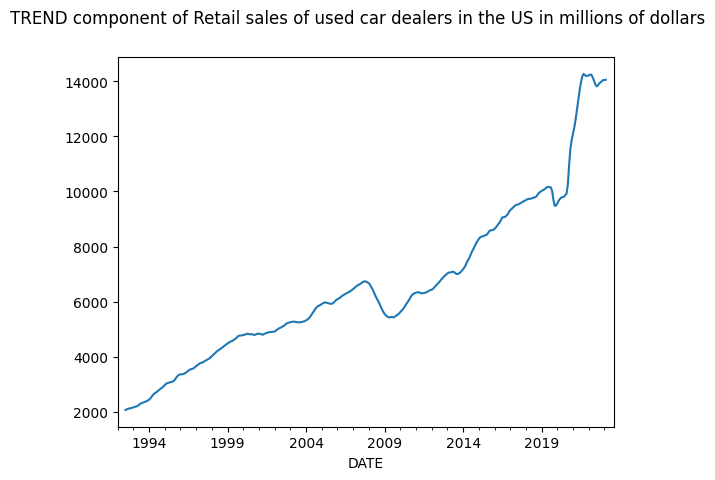

In [35]:

#add a column containing a 2 x 12 centered moving average. this column will capture the trend component in the time series
df['2 x 12 CMA (TREND)'] = np.nan
for i in range(6,df['Retail_Sales'].size-6):
    df['2 x 12 CMA (TREND)'].iloc[i] = df['Retail_Sales'].iloc[i-6] * 1.0 / 24 + (
                df['Retail_Sales'].iloc[i-5] + df['Retail_Sales'].iloc[i-4] + df['Retail_Sales'].iloc[i-3] + df['Retail_Sales'].iloc[
            i-2] + df['Retail_Sales'].iloc[i-1] + df['Retail_Sales'].iloc[i] + df['Retail_Sales'].iloc[i + 1] + df['Retail_Sales'].iloc[
                    i + 2] + df['Retail_Sales'].iloc[i + 3] + df['Retail_Sales'].iloc[i + 4] + df['Retail_Sales'].iloc[
                    i + 5]) * 1.0 / 12 + df['Retail_Sales'].iloc[i + 6] * 1.0 / 24


#plot the trend component
fig = plt.figure()
fig.suptitle('TREND component of Retail sales of used car dealers in the US in millions of dollars')
df['2 x 12 CMA (TREND)'].plot()
plt.show()

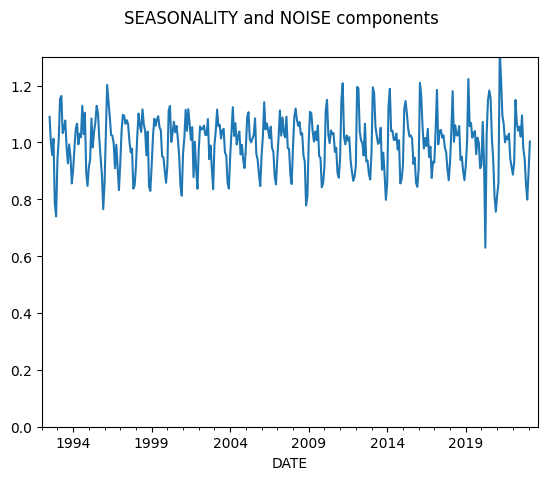

In [36]:

df['SEASONALITY AND NOISE'] = df['Retail_Sales']/df['2 x 12 CMA (TREND)']

#plot the seasonality and noise components
fig = plt.figure()
fig.suptitle('SEASONALITY and NOISE components')
plt.ylim(0, 1.3)
df['SEASONALITY AND NOISE'].plot()
plt.show()

In [41]:
#calculate the average seasonal component for each month

#first add a month column
df['MONTH'] = df.index.strftime('%m').astype(np.int64)

#initialize the month based dictionaries to store the running total of themonth wise  seasonal sums and counts
average_seasonal_values = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
average_seasonal_value_counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

#calculate the sums and counts
for i in range(0, df['SEASONALITY AND NOISE'].size):
    if math.isnan(df['SEASONALITY AND NOISE'].iloc[i]) is False:
        average_seasonal_values[df['MONTH'].iloc[i]] = average_seasonal_values[df['MONTH'].iloc[i]] + df['SEASONALITY AND NOISE'].iloc[i]
        average_seasonal_value_counts[df['MONTH'].iloc[i]] = average_seasonal_value_counts[df['MONTH'].iloc[i]] + 1

#calculate the average seasonal component for each month
for i in range(1, 13):
    average_seasonal_values[i] = average_seasonal_values[i] / average_seasonal_value_counts[i]


Suprimindo os avisos (não recomendo)

Se você estiver putasso com esses avisos pipocando e quer simplesmente que eles sumam, basta inserir o código pd.set_option('mode.chained_assignment', None). Isso fará com que o problema não seja resolvido, mas o aviso não será mais exibido.

In [49]:
pd.set_option('mode.chained_assignment', None)
#create a new column in the data frame and fill it with the value of the average seasonal component for the corresponding month
df['SEASONALITY'] = np.nan
for i in range(0, df['SEASONALITY AND NOISE'].size):
    if math.isnan(df['SEASONALITY AND NOISE'].iloc[i]) is False:
        df['SEASONALITY'].iloc[i] = average_seasonal_values[df['MONTH'].iloc[i]]


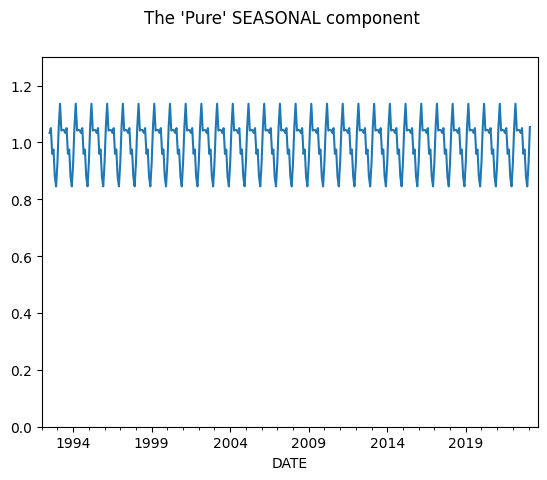

In [50]:

#plot the seasonal component
fig = plt.figure()
fig.suptitle('The \'Pure\' SEASONAL component')
plt.ylim(0, 1.3)
df['SEASONALITY'].plot()
plt.show()


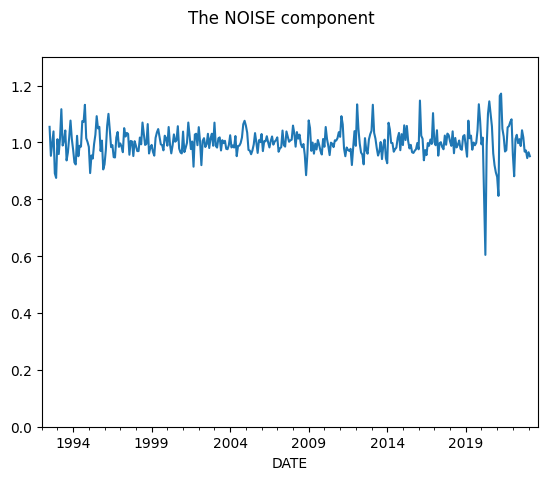

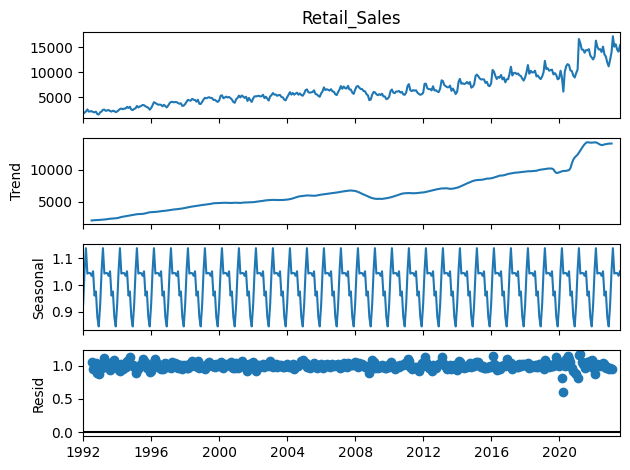

In [19]:

df['NOISE'] = df['SEASONALITY AND NOISE']/df['SEASONALITY']

#plot the seasonal component
fig = plt.figure()
fig.suptitle('The NOISE component')
plt.ylim(0, 1.3)
df['NOISE'].plot()
plt.show()


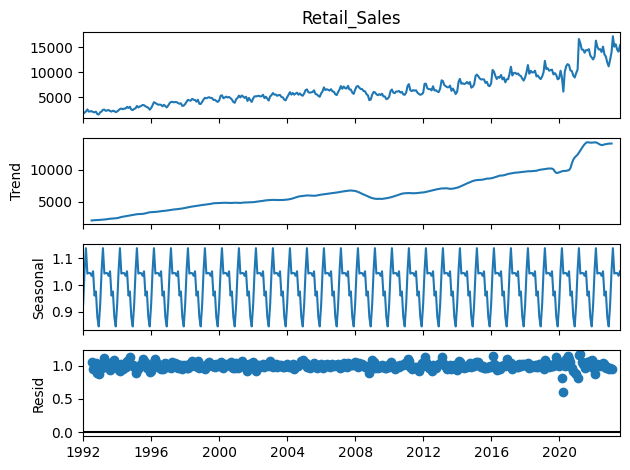

In [48]:

#Do all of the above using  one line of code!
from statsmodels.tsa.seasonal import seasonal_decompose
components = seasonal_decompose(df['Retail_Sales'], model='multiplicative')
components.plot()
plt.show()

## agora com os nossos dados

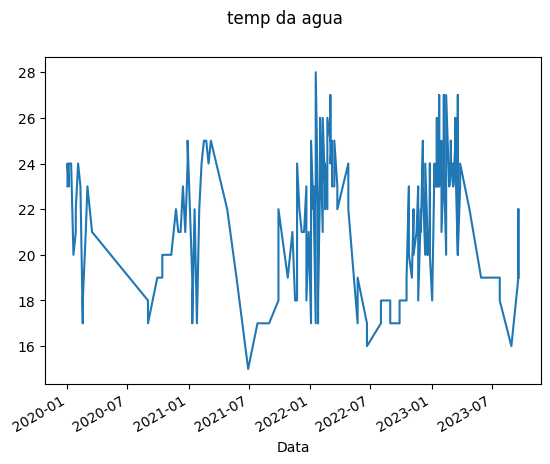

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

#load the data set into a pandas data frame
dfbal = pd.read_csv('D:/ENS410064/Dados/brutos/IMA/baln20202023.csv', header=0, index_col=0, 
                 parse_dates=['Data'], date_format={'Data': '%d/%m/%Y'})

#plot the data set
fig = plt.figure()
#fig.suptitle('concentracao de ecoli em NMP por 100 mL')
fig.suptitle('temp da agua')
dfbal['Tagua'].plot()
plt.show()


components = seasonal_decompose(dfbal['Tagua'], model='aditive')
components.plot()
plt.show()